#  UFRN
## Disciplina: Aprendizado Não Supervisionado de Máquinas

##Lista de Métodos de Redução de Dimensionalidade

Aluno: José Augusto Agripino de Oliveira

PPGEEC - UFRN
2025-2


## Quarta Lista de Simulação
### Questão 1
  - Refaça o exemplo de aplicação dos métodos de redução de dimensionalidade para a base de dados Digit
  - Coloque os resultados num único plot - utilize sub-plots.

### Questão 2
- Refaça o exemplo de aplicação dos métodos de redução de dimensionalidade para a base de dados Rolo_Suiço.
- Coloque os resultados num único plot - utilize sub-plots.

### Questão 3
- Incorpore nos resultados das questões 1 e 2 o método UMAP. Analise a influência dos hiperparâmetros (número de vizinhos e distância mínima)

### Questão 4
- Incorpore nos resultados das questões 1 e 2 o método Autoencoder. Analise a influência dos hiperparâmetros (núemero de neorônio, número de camadas). Considere o autoencoder padrão e um autoencoder com regulação.


## Resolução das Questões

### Imports e Configurações Iniciais

In [ ]:
# Imports necessários para todas as questões
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets, manifold
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler

import umap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Carregar dados Digits
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Criar dados Swiss Roll
n_points = 2000
X_swiss, color_swiss = datasets.make_swiss_roll(n_points, random_state=0)

print("Dados carregados com sucesso!")
print(f"Digits: {X_digits.shape}")
print(f"Swiss Roll: {X_swiss.shape}")

Dados carregados com sucesso!
Digits: (1797, 64)
Swiss Roll: (2000, 3)


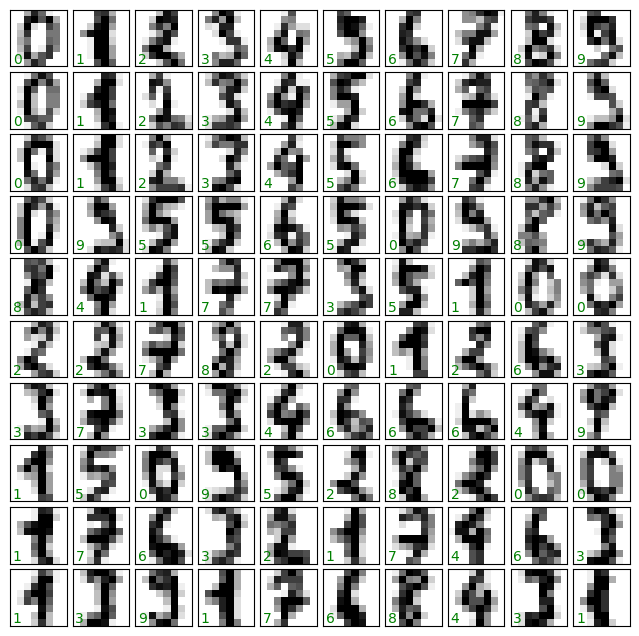

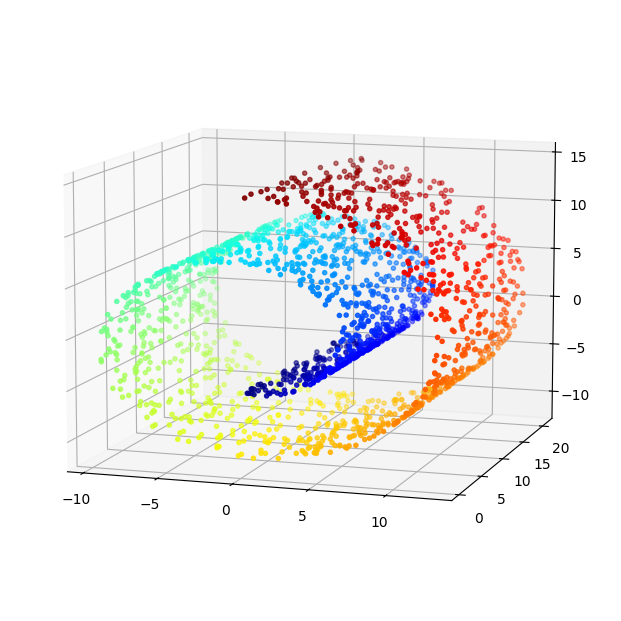

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')

fig = plt.figure(figsize=(45, 25))
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=color_swiss, cmap=plt.
cm.jet, s=9, lw=1)
ax.view_init(10, -72)

### 3.1 Questão 1 - Métodos de Redução de Dimensionalidade para Digits

Aplicação dos métodos PCA, MDS, Isomap, LLE e t-SNE na base de dados Digits, com resultados em subplots.

Aplicando PCA...
Aplicando MDS...
Aplicando Isomap...
Aplicando LLE...
Aplicando t-SNE...
Transformações concluídas!


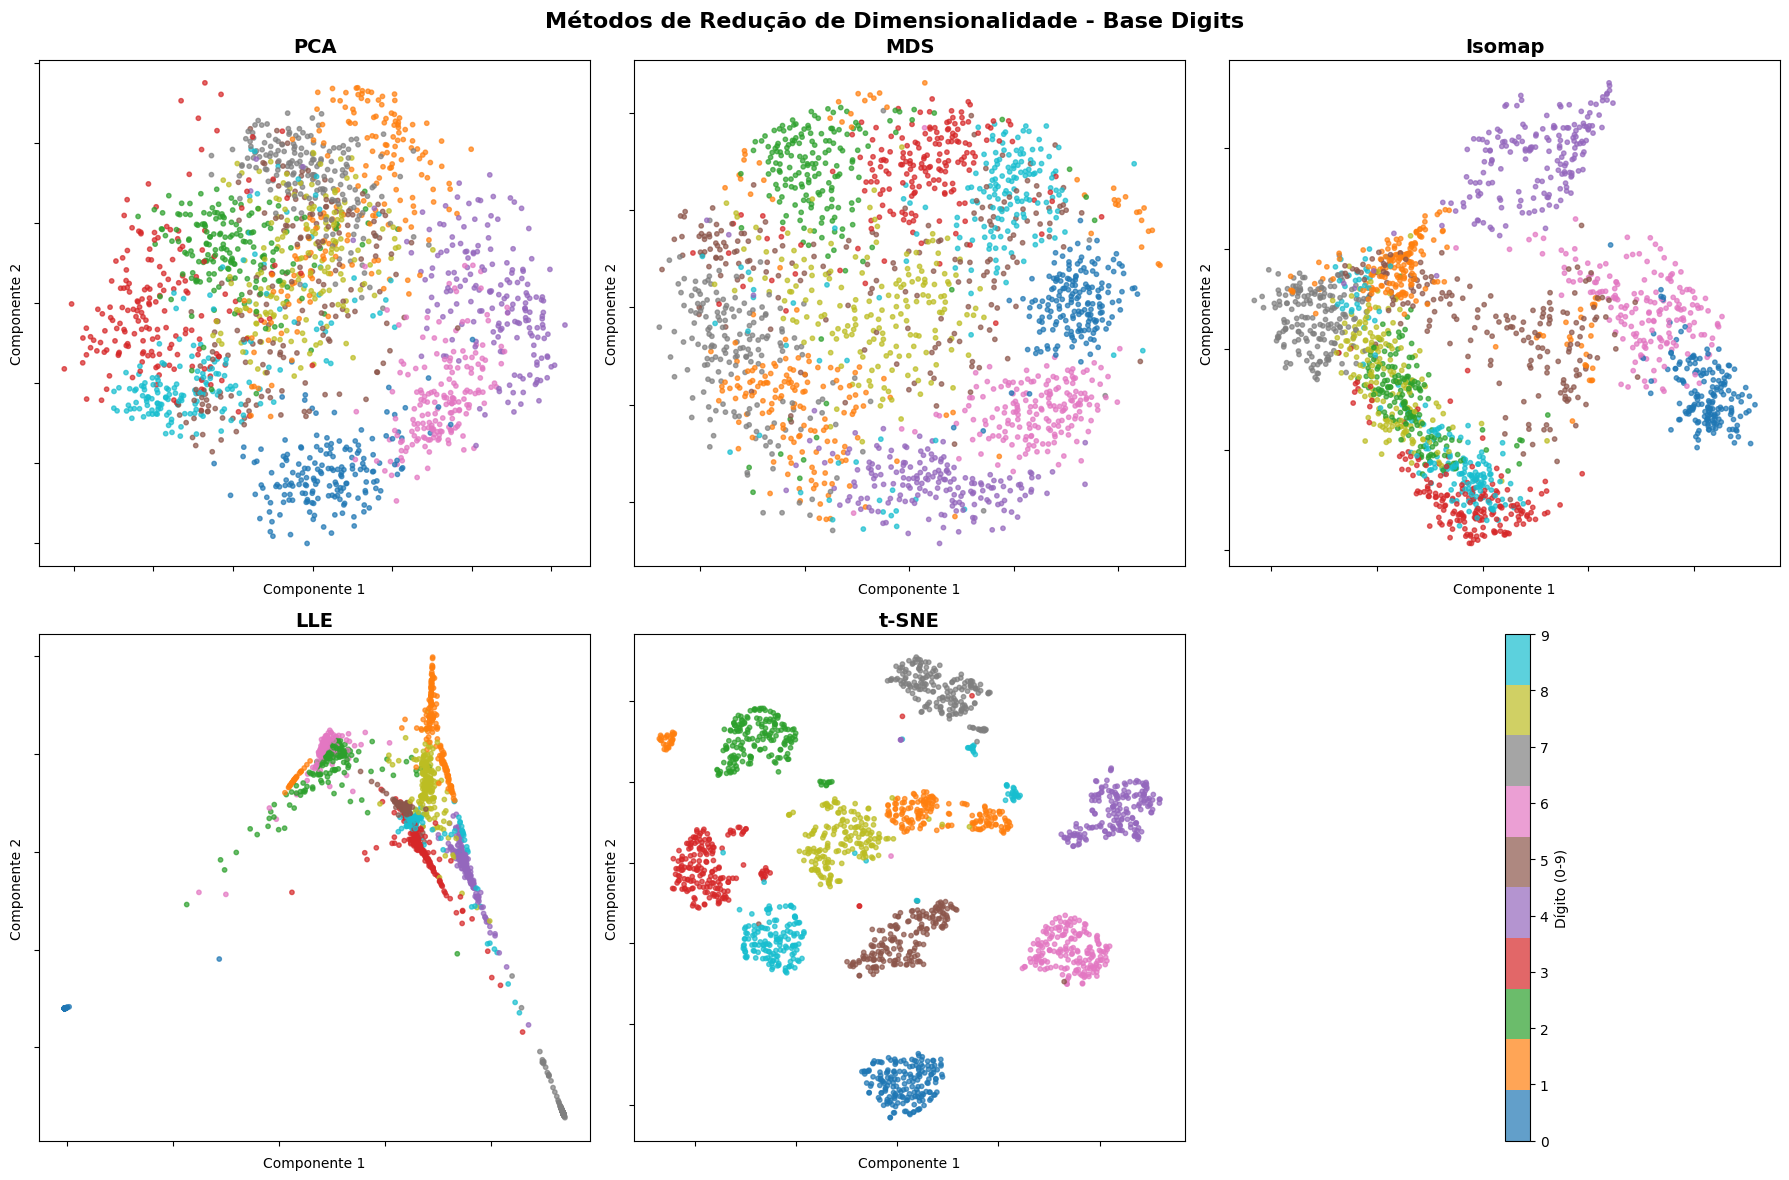

In [ ]:
# Questão 1: Métodos de Redução de Dimensionalidade para Digits

# Aplicar os métodos
print("Aplicando PCA...")
X_pca_digits = PCA(n_components=2).fit_transform(X_digits)

print("Aplicando MDS...")
X_mds_digits = manifold.MDS(n_components=2, random_state=0, normalized_stress='auto').fit_transform(X_digits)

print("Aplicando Isomap...")
X_iso_digits = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(X_digits)

print("Aplicando LLE...")
X_lle_digits = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard').fit_transform(X_digits)

print("Aplicando t-SNE...")
X_tsne_digits = manifold.TSNE(n_components=2, init='pca', random_state=0).fit_transform(X_digits)

print("Transformações concluídas!")

# Plotar resultados em subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Métodos de Redução de Dimensionalidade - Base Digits', fontsize=16, fontweight='bold')

methods = [
    (X_pca_digits, 'PCA'),
    (X_mds_digits, 'MDS'),
    (X_iso_digits, 'Isomap'),
    (X_lle_digits, 'LLE'),
    (X_tsne_digits, 't-SNE')
]

for idx, (data, title) in enumerate(methods):
    row, col = idx // 3, idx % 3
    ax = axes[row, col]
    scatter = ax.scatter(data[:, 0], data[:, 1], c=y_digits, cmap='tab10', s=10, alpha=0.7)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())

# Remover subplot vazio e adicionar colorbar
axes[1, 2].axis('off')
cbar = fig.colorbar(scatter, ax=axes[1, 2], orientation='vertical', fraction=0.5)
cbar.set_label('Dígito (0-9)')

plt.tight_layout()
plt.show()

### 3.2 Questão 2 - Métodos de Redução de Dimensionalidade para Rolo Suíço

Aplicação dos métodos PCA, MDS, Isomap, LLE e t-SNE na base de dados Swiss Roll (Rolo Suíço), com resultados em subplots.

Aplicando PCA...
Aplicando MDS...
Aplicando Isomap...
Aplicando LLE...
Aplicando t-SNE...
Transformações concluídas!


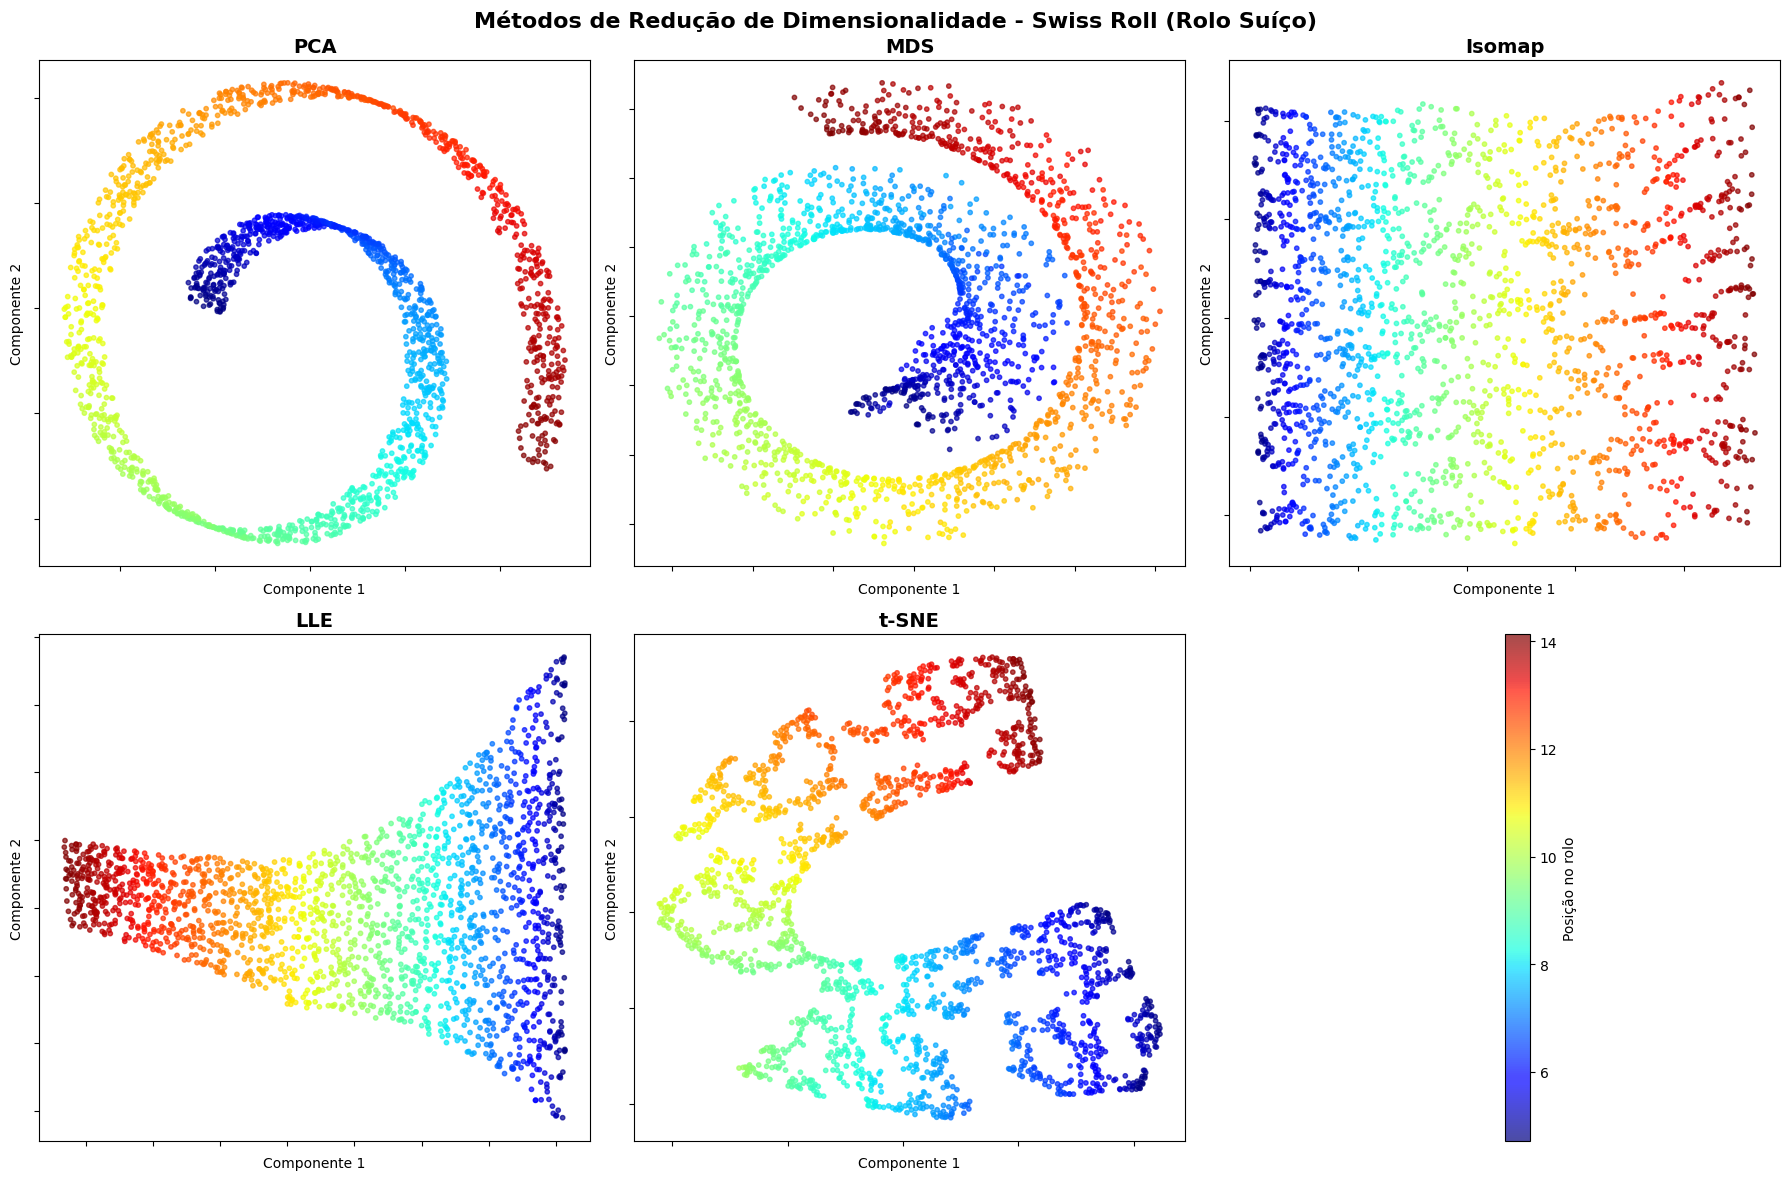

In [ ]:
# Questão 2: Métodos de Redução de Dimensionalidade para Swiss Roll

# Aplicar os métodos
print("Aplicando PCA...")
X_pca_swiss = PCA(n_components=2).fit_transform(X_swiss)

print("Aplicando MDS...")
X_mds_swiss = manifold.MDS(n_components=2, random_state=0, normalized_stress='auto').fit_transform(X_swiss)

print("Aplicando Isomap...")
X_iso_swiss = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(X_swiss)

print("Aplicando LLE...")
X_lle_swiss = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard').fit_transform(X_swiss)

print("Aplicando t-SNE...")
X_tsne_swiss = manifold.TSNE(n_components=2, init='pca', random_state=0).fit_transform(X_swiss)

print("Transformações concluídas!")

# Plotar resultados em subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Métodos de Redução de Dimensionalidade - Swiss Roll (Rolo Suíço)', fontsize=16, fontweight='bold')

methods_swiss = [
    (X_pca_swiss, 'PCA'),
    (X_mds_swiss, 'MDS'),
    (X_iso_swiss, 'Isomap'),
    (X_lle_swiss, 'LLE'),
    (X_tsne_swiss, 't-SNE')
]

for idx, (data, title) in enumerate(methods_swiss):
    row, col = idx // 3, idx % 3
    ax = axes[row, col]
    scatter = ax.scatter(data[:, 0], data[:, 1], c=color_swiss, cmap=plt.cm.jet, s=10, alpha=0.7)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())

# Remover subplot vazio e adicionar colorbar
axes[1, 2].axis('off')
cbar = fig.colorbar(scatter, ax=axes[1, 2], orientation='vertical', fraction=0.5)
cbar.set_label('Posição no rolo')

plt.tight_layout()
plt.show()

### 3.3 Questão 3 - UMAP com Análise de Hiperparâmetros

Incorporação do método UMAP às questões 1 e 2, com análise da influência dos hiperparâmetros:
- **n_neighbors**: Número de vizinhos (controla a estrutura local vs global)
- **min_dist**: Distância mínima entre pontos (controla o quão compactos são os clusters)

UMAP Digits: n_neighbors=5, min_dist=0.0
UMAP Digits: n_neighbors=5, min_dist=0.1
UMAP Digits: n_neighbors=5, min_dist=0.5
UMAP Digits: n_neighbors=15, min_dist=0.0
UMAP Digits: n_neighbors=15, min_dist=0.1
UMAP Digits: n_neighbors=15, min_dist=0.5
UMAP Digits: n_neighbors=50, min_dist=0.0
UMAP Digits: n_neighbors=50, min_dist=0.1
UMAP Digits: n_neighbors=50, min_dist=0.5


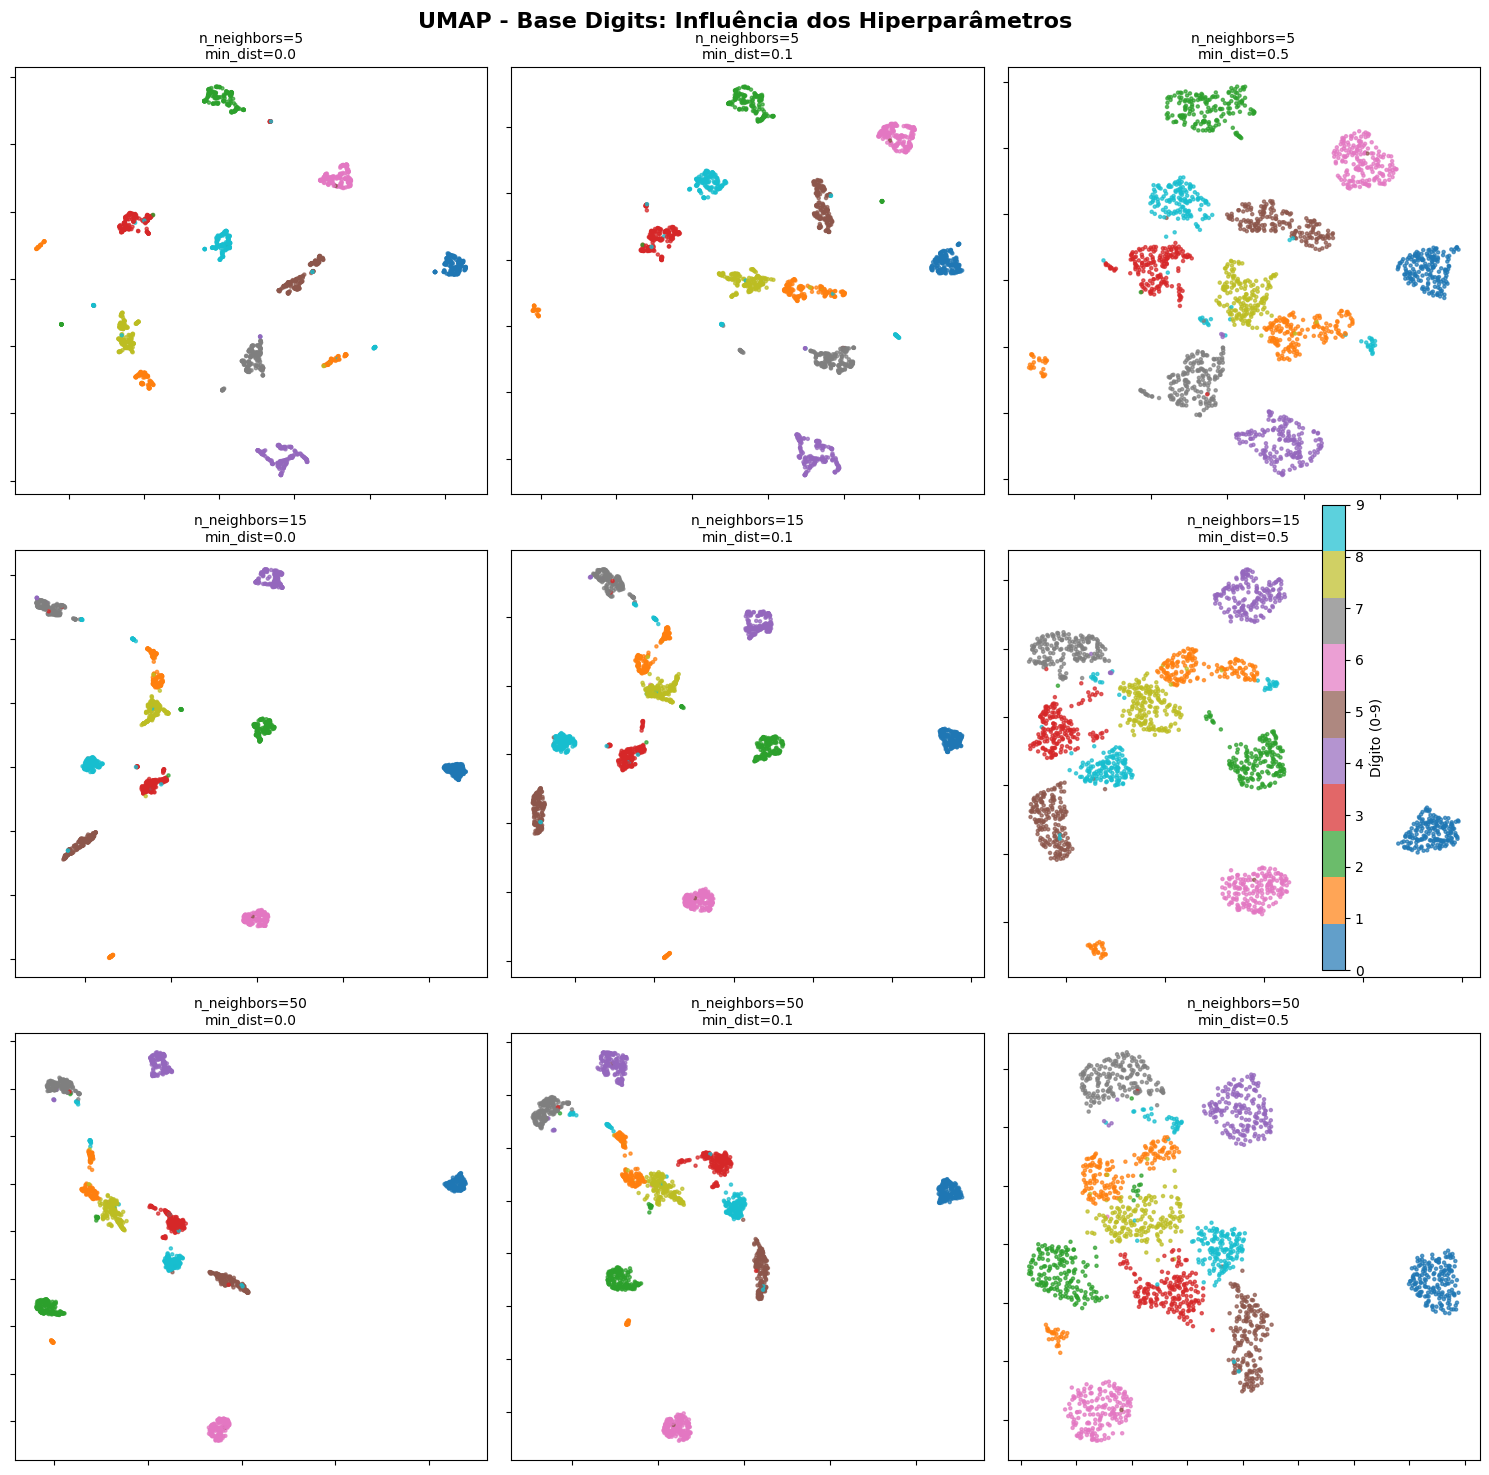

In [ ]:
# Questão 3: UMAP para Digits - Análise de Hiperparâmetros

# Definir combinações de hiperparâmetros
n_neighbors_list = [5, 15, 50]
min_dist_list = [0.0, 0.1, 0.5]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('UMAP - Base Digits: Influência dos Hiperparâmetros', fontsize=16, fontweight='bold')

for i, n_neighbors in enumerate(n_neighbors_list):
    for j, min_dist in enumerate(min_dist_list):
        print(f"UMAP Digits: n_neighbors={n_neighbors}, min_dist={min_dist}")

        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
        X_umap = reducer.fit_transform(X_digits)

        ax = axes[i, j]
        scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y_digits, cmap='tab10', s=5, alpha=0.7)
        ax.set_title(f'n_neighbors={n_neighbors}\nmin_dist={min_dist}', fontsize=10)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())

# Adicionar colorbar
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Dígito (0-9)')

plt.tight_layout()
plt.show()

UMAP Swiss Roll: n_neighbors=5, min_dist=0.0
UMAP Swiss Roll: n_neighbors=5, min_dist=0.1
UMAP Swiss Roll: n_neighbors=5, min_dist=0.5
UMAP Swiss Roll: n_neighbors=15, min_dist=0.0
UMAP Swiss Roll: n_neighbors=15, min_dist=0.1
UMAP Swiss Roll: n_neighbors=15, min_dist=0.5
UMAP Swiss Roll: n_neighbors=50, min_dist=0.0
UMAP Swiss Roll: n_neighbors=50, min_dist=0.1
UMAP Swiss Roll: n_neighbors=50, min_dist=0.5


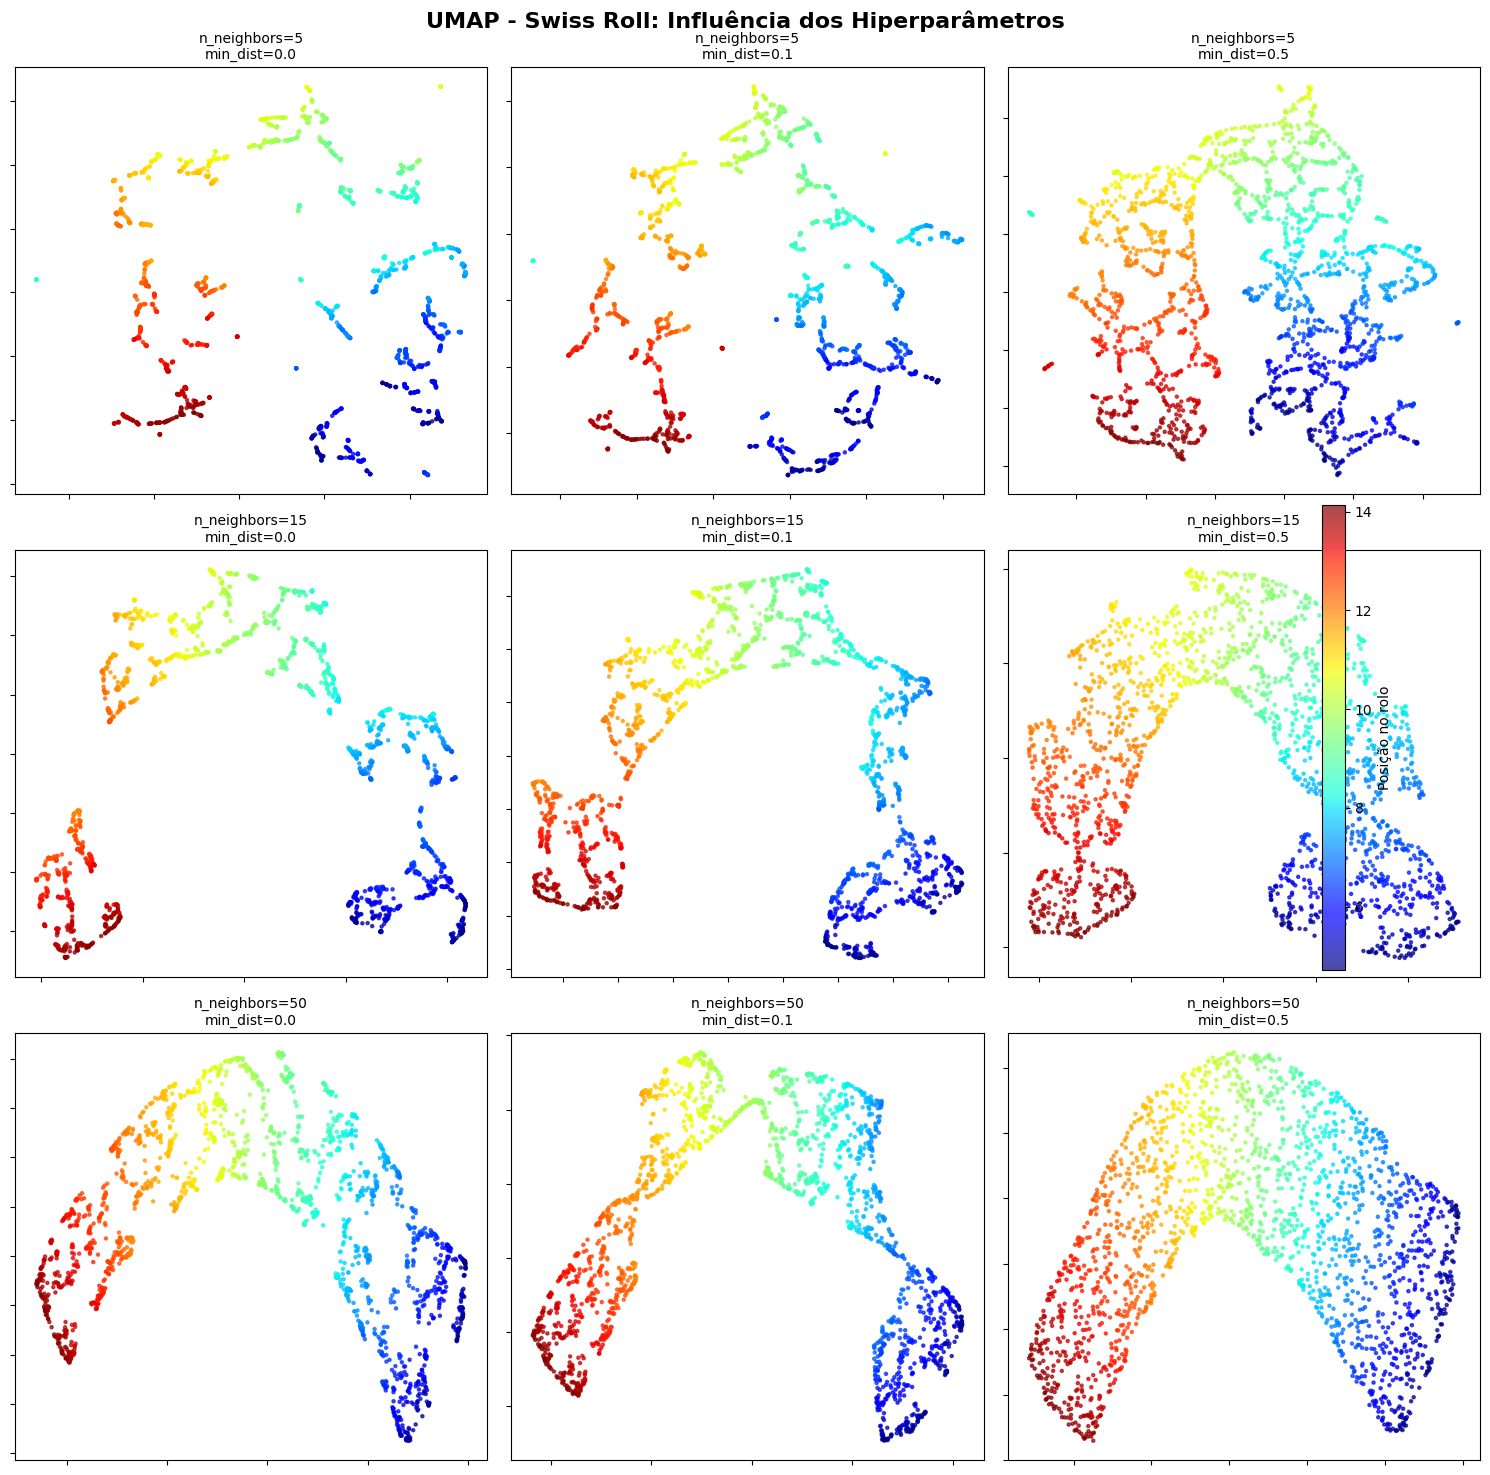

In [ ]:
# Questão 3: UMAP para Swiss Roll - Análise de Hiperparâmetros

# Definir combinações de hiperparâmetros
n_neighbors_list = [5, 15, 50]
min_dist_list = [0.0, 0.1, 0.5]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('UMAP - Swiss Roll: Influência dos Hiperparâmetros', fontsize=16, fontweight='bold')

for i, n_neighbors in enumerate(n_neighbors_list):
    for j, min_dist in enumerate(min_dist_list):
        print(f"UMAP Swiss Roll: n_neighbors={n_neighbors}, min_dist={min_dist}")

        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
        X_umap_swiss = reducer.fit_transform(X_swiss)

        ax = axes[i, j]
        scatter = ax.scatter(X_umap_swiss[:, 0], X_umap_swiss[:, 1], c=color_swiss, cmap=plt.cm.jet, s=5, alpha=0.7)
        ax.set_title(f'n_neighbors={n_neighbors}\nmin_dist={min_dist}', fontsize=10)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())

# Adicionar colorbar
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Posição no rolo')

plt.tight_layout()
plt.show()

### 3.4 Questão 4 - Autoencoders com Análise de Hiperparâmetros

Incorporação do método Autoencoder às questões 1 e 2, com análise da influência dos hiperparâmetros:
- **Número de neurônios**: Tamanho da camada latente (encoding dimension)
- **Número de camadas**: Profundidade da rede
- **Regularização**: Autoencoder padrão vs autoencoder com regularização L2

In [ ]:
# Imports para Autoencoders
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Model

# Normalizar os dados
scaler_digits = StandardScaler()
X_digits_scaled = scaler_digits.fit_transform(X_digits)

scaler_swiss = StandardScaler()
X_swiss_scaled = scaler_swiss.fit_transform(X_swiss)

print("Dados normalizados!")
print(f"Digits escalado: {X_digits_scaled.shape}")
print(f"Swiss Roll escalado: {X_swiss_scaled.shape}")

Dados normalizados!
Digits escalado: (1797, 64)
Swiss Roll escalado: (2000, 3)


In [ ]:
# Função para criar autoencoder
def create_autoencoder(input_dim, encoding_dim, num_layers=1, use_regularization=False):
    """
    Cria um autoencoder

    Args:
        input_dim: Dimensão de entrada
        encoding_dim: Dimensão da camada latente (2 para visualização)
        num_layers: Número de camadas ocultas no encoder/decoder
        use_regularization: Se True, aplica regularização L2
    """
    reg = regularizers.l2(0.001) if use_regularization else None

    # Encoder
    encoder_input = keras.Input(shape=(input_dim,))
    x = encoder_input

    # Camadas intermediárias do encoder
    hidden_dims = np.linspace(input_dim, encoding_dim, num_layers + 2, dtype=int)[1:-1]
    for dim in hidden_dims:
        x = layers.Dense(dim, activation='relu', kernel_regularizer=reg)(x)

    # Camada latente
    encoded = layers.Dense(encoding_dim, activation='relu', name='encoded')(x)

    # Decoder
    x = encoded
    for dim in reversed(hidden_dims):
        x = layers.Dense(dim, activation='relu', kernel_regularizer=reg)(x)

    decoded = layers.Dense(input_dim, activation='linear')(x)

    # Modelos
    autoencoder = Model(encoder_input, decoded)
    encoder = Model(encoder_input, encoded)

    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder, encoder

print("Funções de autoencoder criadas!")

Funções de autoencoder criadas!


Treinando Autoencoder Digits: 1 camada, sem reg
Treinando Autoencoder Digits: 2 camadas, sem reg
Treinando Autoencoder Digits: 3 camadas, sem reg
Treinando Autoencoder Digits: 1 camada, com reg
Treinando Autoencoder Digits: 2 camadas, com reg
Treinando Autoencoder Digits: 3 camadas, com reg


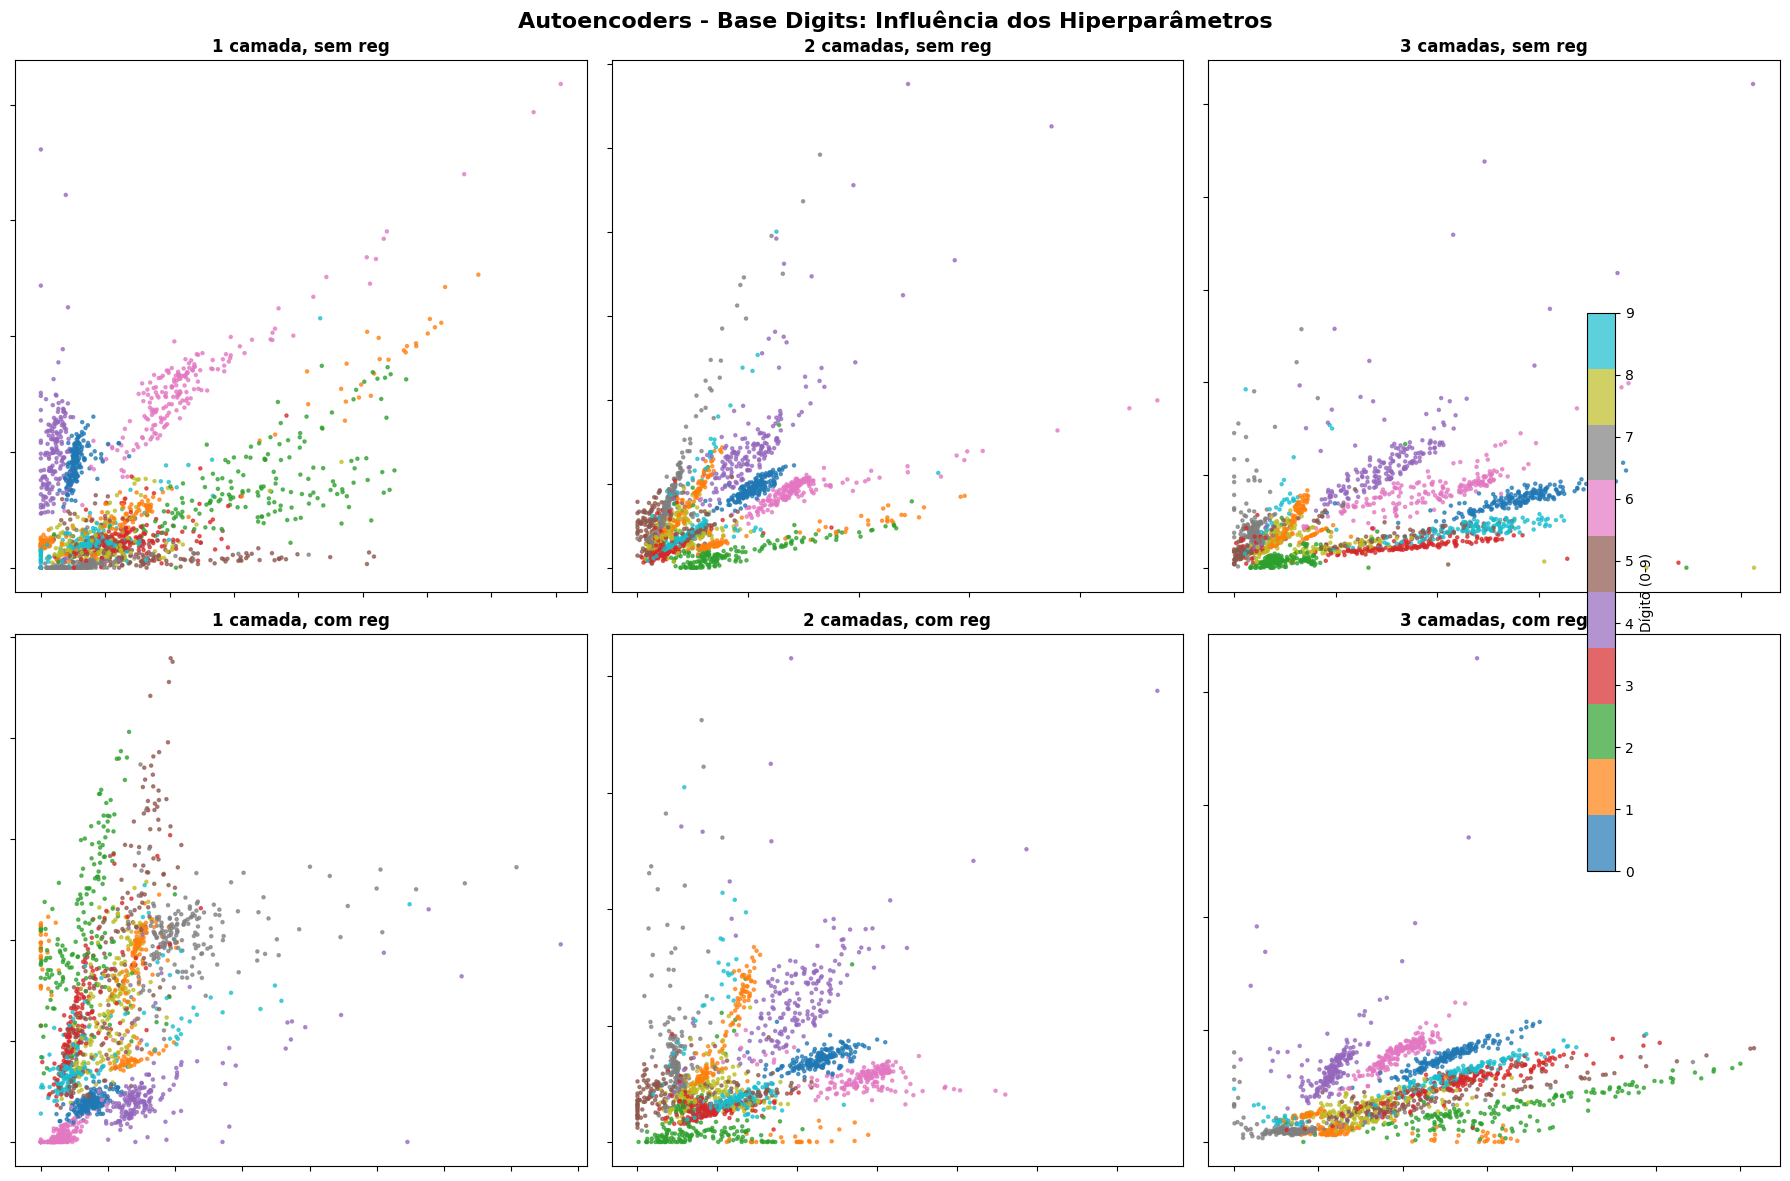

In [12]:
# Questão 4: Autoencoders para Digits - Análise de Hiperparâmetros

# Configurações
configs = [
    {'layers': 1, 'reg': False, 'name': '1 camada, sem reg'},
    {'layers': 2, 'reg': False, 'name': '2 camadas, sem reg'},
    {'layers': 3, 'reg': False, 'name': '3 camadas, sem reg'},
    {'layers': 1, 'reg': True, 'name': '1 camada, com reg'},
    {'layers': 2, 'reg': True, 'name': '2 camadas, com reg'},
    {'layers': 3, 'reg': True, 'name': '3 camadas, com reg'},
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Autoencoders - Base Digits: Influência dos Hiperparâmetros', fontsize=16, fontweight='bold')

for idx, config in enumerate(configs):
    print(f"Treinando Autoencoder Digits: {config['name']}")

    # Criar e treinar autoencoder
    autoencoder, encoder = create_autoencoder(
        input_dim=X_digits_scaled.shape[1],
        encoding_dim=2,
        num_layers=config['layers'],
        use_regularization=config['reg']
    )

    autoencoder.fit(X_digits_scaled, X_digits_scaled,
                    epochs=50, batch_size=32, verbose=0, shuffle=True)

    # Obter representação 2D
    X_encoded = encoder.predict(X_digits_scaled, verbose=0)

    # Plotar
    row, col = idx // 3, idx % 3
    ax = axes[row, col]
    scatter = ax.scatter(X_encoded[:, 0], X_encoded[:, 1], c=y_digits, cmap='tab10', s=5, alpha=0.7)
    ax.set_title(config['name'], fontsize=12, fontweight='bold')
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())

# Adicionar colorbar
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Dígito (0-9)')

plt.tight_layout()
plt.show()

Treinando Autoencoder Swiss Roll: 1 camada, sem reg
Treinando Autoencoder Swiss Roll: 2 camadas, sem reg
Treinando Autoencoder Swiss Roll: 3 camadas, sem reg
Treinando Autoencoder Swiss Roll: 1 camada, com reg
Treinando Autoencoder Swiss Roll: 2 camadas, com reg
Treinando Autoencoder Swiss Roll: 3 camadas, com reg


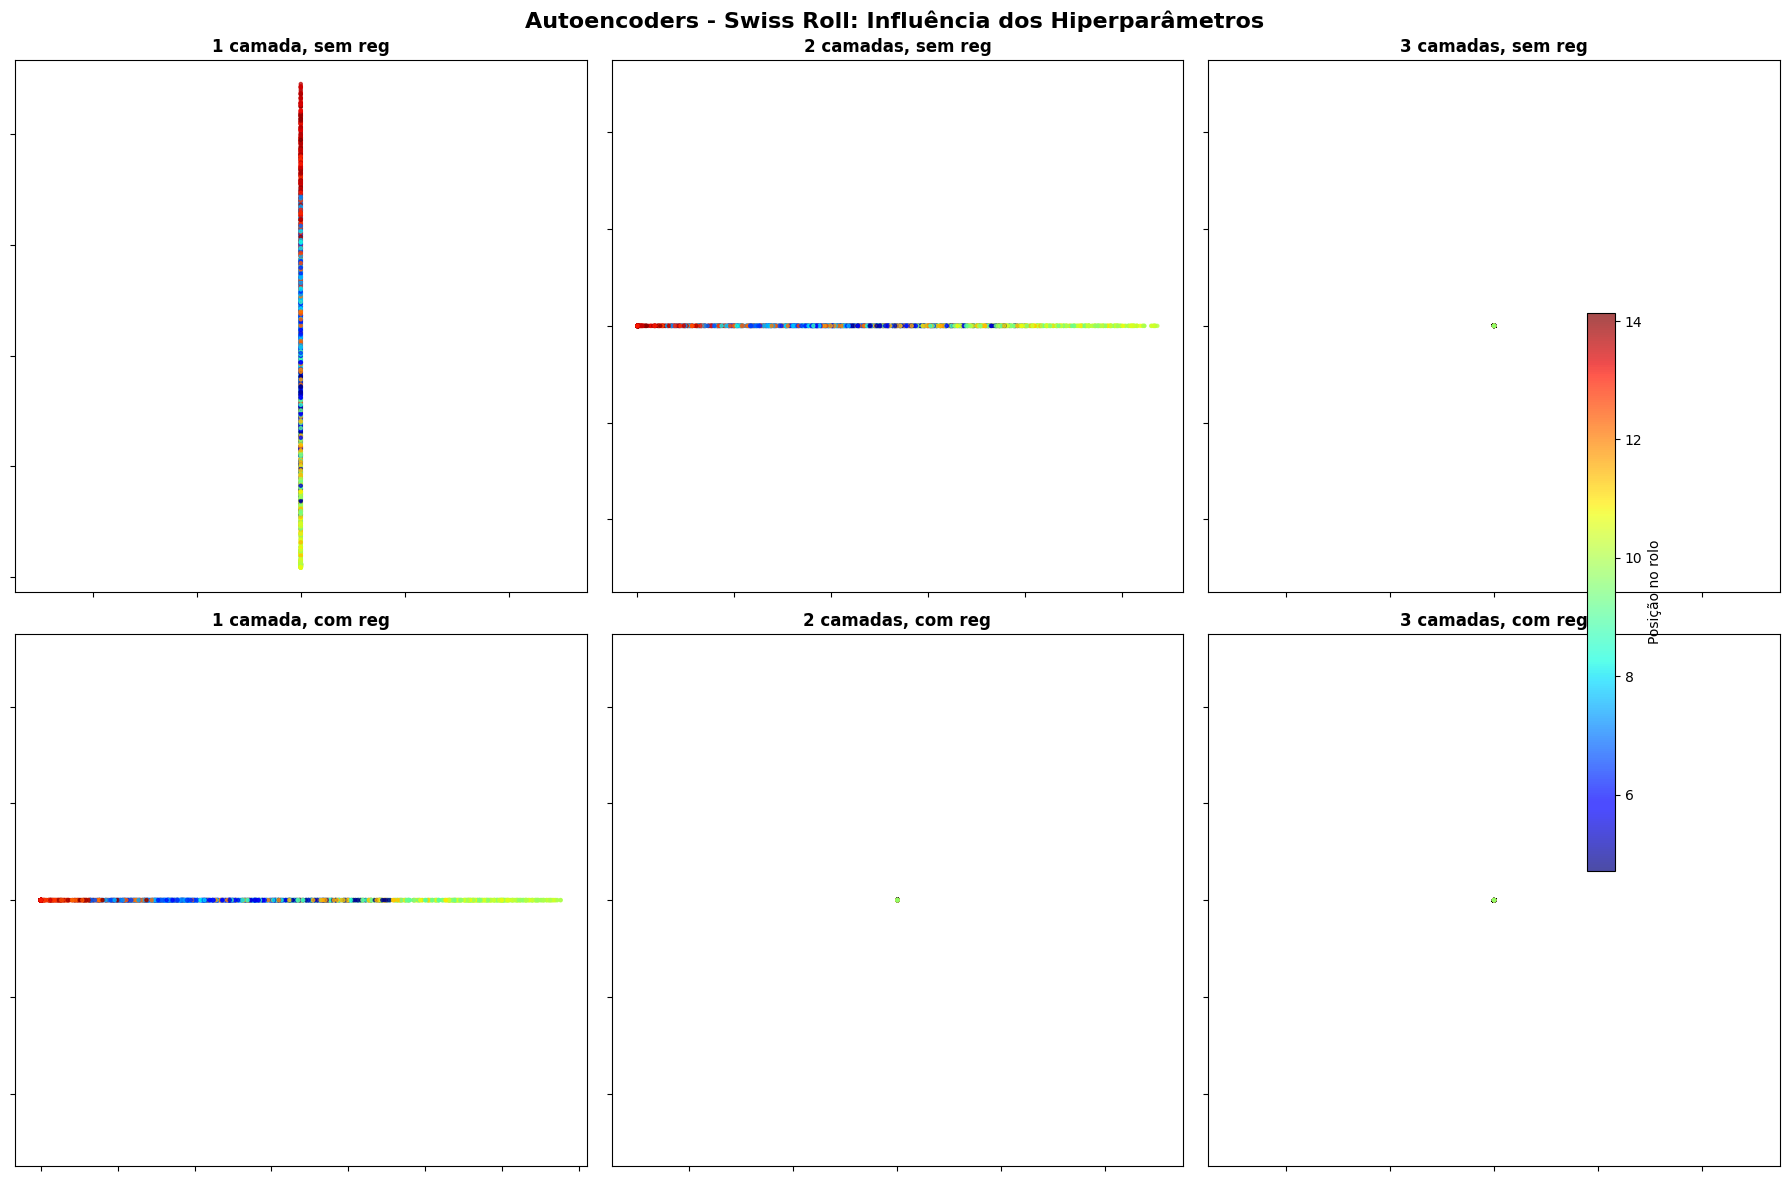

In [13]:
# Questão 4: Autoencoders para Swiss Roll - Análise de Hiperparâmetros

# Configurações
configs = [
    {'layers': 1, 'reg': False, 'name': '1 camada, sem reg'},
    {'layers': 2, 'reg': False, 'name': '2 camadas, sem reg'},
    {'layers': 3, 'reg': False, 'name': '3 camadas, sem reg'},
    {'layers': 1, 'reg': True, 'name': '1 camada, com reg'},
    {'layers': 2, 'reg': True, 'name': '2 camadas, com reg'},
    {'layers': 3, 'reg': True, 'name': '3 camadas, com reg'},
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Autoencoders - Swiss Roll: Influência dos Hiperparâmetros', fontsize=16, fontweight='bold')

for idx, config in enumerate(configs):
    print(f"Treinando Autoencoder Swiss Roll: {config['name']}")

    # Criar e treinar autoencoder
    autoencoder, encoder = create_autoencoder(
        input_dim=X_swiss_scaled.shape[1],
        encoding_dim=2,
        num_layers=config['layers'],
        use_regularization=config['reg']
    )

    autoencoder.fit(X_swiss_scaled, X_swiss_scaled,
                    epochs=100, batch_size=64, verbose=0, shuffle=True)

    # Obter representação 2D
    X_encoded = encoder.predict(X_swiss_scaled, verbose=0)

    # Plotar
    row, col = idx // 3, idx % 3
    ax = axes[row, col]
    scatter = ax.scatter(X_encoded[:, 0], X_encoded[:, 1], c=color_swiss, cmap=plt.cm.jet, s=5, alpha=0.7)
    ax.set_title(config['name'], fontsize=12, fontweight='bold')
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())

# Adicionar colorbar
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Posição no rolo')

plt.tight_layout()
plt.show()

## Conclusões

### Questão 1 - Digits
Os métodos aplicados à base Digits mostraram diferentes capacidades de separação:
- **PCA**: Separação linear básica, mantém estrutura global
- **MDS**: Similar ao PCA, preserva distâncias globais
- **Isomap**:
  - Assume que o manifold é suave, contínuo e bem amostrado, o que não é o caso para a base de dados Digits.
  - Ele contrói um grafo de vizinhança ruim e os resultados finais não são bons.
- **LLE**:
  - Assume que o manifold é suave, contínuo e bem amostrado, o que não é o caso para a base de dados Digits.
  - Cada ponto é obtido a partir de uma combinação linear dos vizinhos, e para o Digits isso é um problema, já que, por exemplo, o 1 não é uma combinação linear dos números 9 e 4.
  - O LLE possui sensibilidade extrema ao ruído.
- **t-SNE**:
  - Focam em separação local, sem tentar preservar a geometria física, como a distância entre os clusters.
  - Alcançou uma excelente separação visual com clusters bem definidos.

### Questão 2 - Swiss Roll
Para o Swiss Roll, que possui estrutura não-linear clara:
- **PCA**: Falha em desenrolar, mantém estrutura colapsada
- **MDS**: Similar ao PCA, não captura a estrutura do rolo
- **Isomap**: **Melhor resultado** - desenrola perfeitamente o rolo
- **LLE**: Desenrola parcialmente, com algumas distorções
- **t-SNE**: Desenrola bem, mas perde continuidade do gradiente

### Questão 3 - UMAP
O UMAP mostrou sensibilidade aos hiperparâmetros:
- **n_neighbors baixo (5)**: Foca em estrutura local, clusters mais fragmentados
- **n_neighbors alto (50)**: Preserva estrutura global, clusters mais coesos
- **min_dist baixo (0.0)**: Clusters compactos e bem separados
- **min_dist alto (0.5)**: Visualização mais distribuída e espaçada

### Questão 4 - Autoencoders
Os autoencoders demonstraram comportamentos distintos:

**Para Digits:**
- **1 camada**: Separação básica, similar ao PCA
- **2-3 camadas**: Melhor separação não-linear dos dígitos
- **Com regularização**: Evita overfitting, representações mais robustas

**Para Swiss Roll:**
- **1 camada sem reg**: Consegue desenrolar parcialmente o rolo
- **2 camadas**: Melhor desenrolamento, preserva gradiente de cor
- **Com regularização**: Representações mais lineares e compactas
- **Overfitting em 3 camadas**: Pode colapsar a estrutura

### Observações Gerais
1. Métodos não-lineares (Isomap, t-SNE, UMAP) são superiores para estruturas complexas
2. UMAP oferece melhor balanço entre velocidade e qualidade
3. Autoencoders são flexíveis mas requerem ajuste cuidadoso de hiperparâmetros
4. Regularização é importante para evitar overfitting em autoencoders profundos